In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=123, n_redundant=0)


In [46]:
X

array([[ 1.34247644, -0.39401801,  1.25274164, -1.01405074,  0.63223279],
       [ 0.56134365, -1.68689509, -0.57656055, -0.8953309 , -0.85977507],
       [-1.09832947, -1.07741076, -1.66757335, -1.25118494,  0.52434435],
       ...,
       [ 1.26260148, -0.33849235,  0.9932887 , -0.87544388,  1.04481564],
       [ 1.16302252,  1.03555403, -0.02132687,  1.09976599,  1.6640582 ],
       [-1.83623101, -1.62372911,  0.52899084,  0.23049856,  1.92351298]],
      shape=(1000, 5))

In [47]:
y

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,

<Axes: xlabel='0', ylabel='1'>

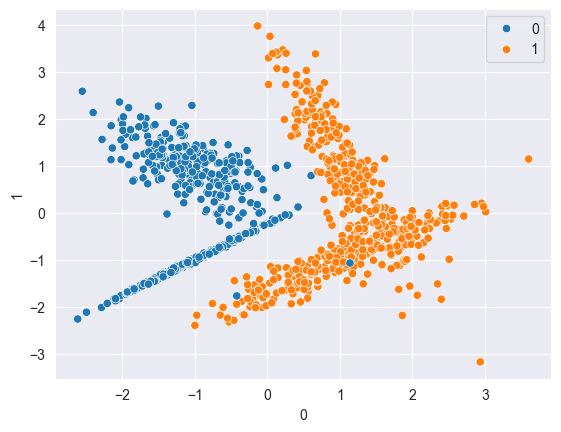

In [48]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [51]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[100,   2],
       [  0,  98]])

In [53]:
accuracy_score(y_test, y_pred)


0.99

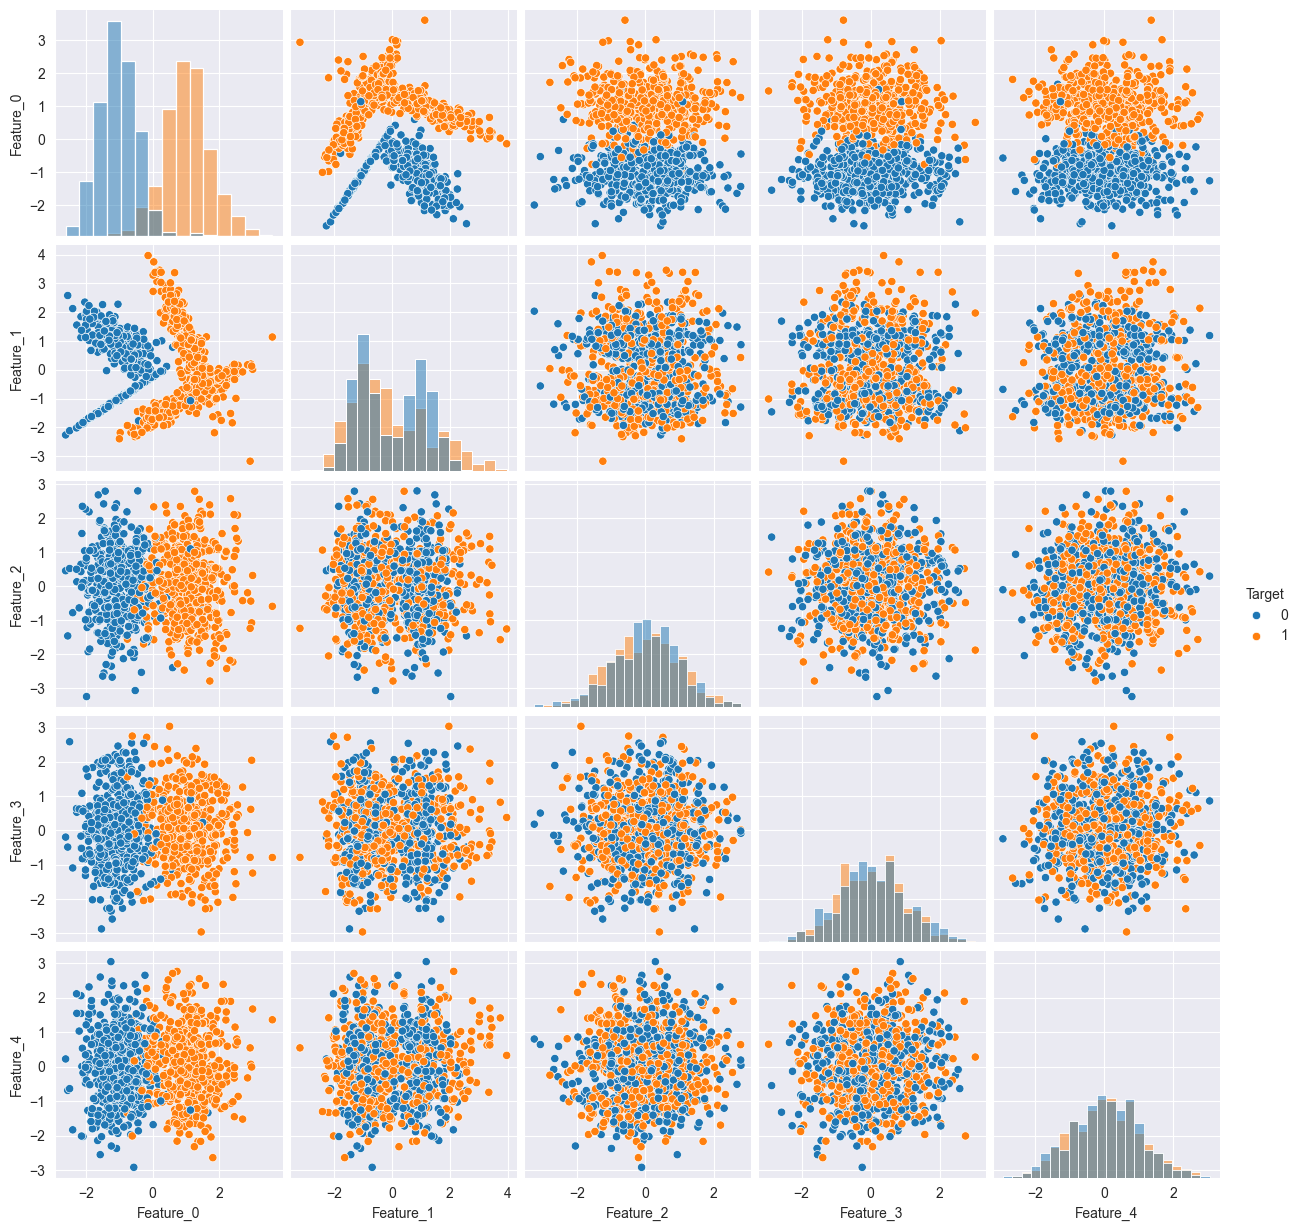

In [49]:
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
df["Target"] = y

# Pairplot
sns.pairplot(df, hue="Target", diag_kind="hist")
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["rbf"]
}

grid = GridSearchCV(SVC(), param_grid, n_jobs=-1, refit=True, cv=5)
grid.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [56]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [57]:
y_pred1 = grid.predict(X_test)
accuracy_score(y_test, y_pred1)

0.99